In [1]:
# 引入数据科学相关工具包：
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns

In [2]:
# 加载训练数据：         
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 
                'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [3]:
# 数据查看：
print("Class labels",np.unique(wine["Class label"]))
wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
y = wine['Class label'].values
X = wine[['Alcohol','OD280/OD315 of diluted wines']].values

# 按8：2分割训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)  # stratify参数代表了按照y的类别等比例抽样

In [34]:
# 使用单一决策树建模
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth = 1)
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train,tree_test))

Decision tree train/test accuracies 0.597/0.611


In [35]:
# 使用sklearn实现Adaboost(基分类器为决策树)
'''
AdaBoostClassifier相关参数：
base_estimator：基本分类器，默认为DecisionTreeClassifier(max_depth=1)
n_estimators：终止迭代的次数
learning_rate：学习率
algorithm：训练的相关算法，{'SAMME'，'SAMME.R'}，默认='SAMME.R'
random_state：随机种子
'''
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=300,learning_rate=0.01,random_state=1)
ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train,y_train_pred)
ada_test = accuracy_score(y_test,y_test_pred)
print('Adaboost train/test accuracies %.3f/%.3f' % (ada_train,ada_test))

Adaboost train/test accuracies 0.855/0.852


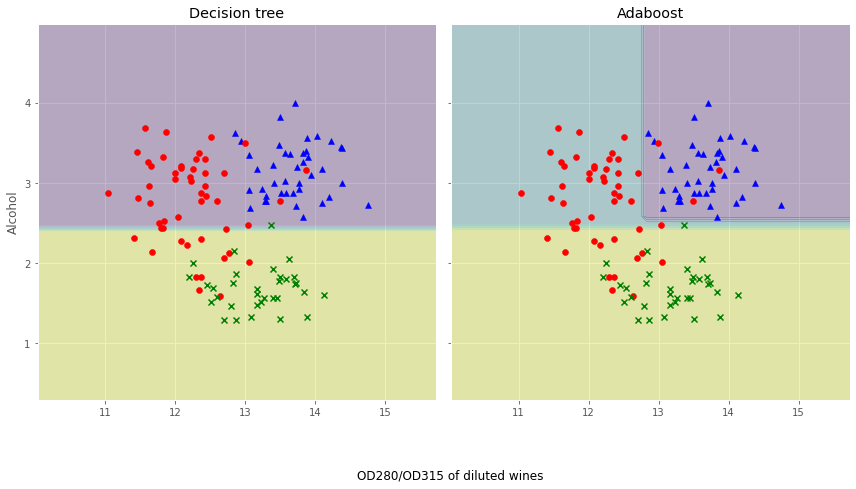

In [36]:
# 画出单层决策树与Adaboost的决策边界：
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(12, 6))
for idx, clf, tt in zip([0, 1],[tree, ada],['Decision tree', 'Adaboost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==1, 0],X_train[y_train==1, 1],c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==2, 0],X_train[y_train==2, 1],c='red', marker='o')
    axarr[idx].scatter(X_train[y_train==3, 0],X_train[y_train==3, 1],c='green', marker='x')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.text(0, -0.2,s='OD280/OD315 of diluted wines',ha='center',va='center',fontsize=12,transform=axarr[1].transAxes)
plt.show()

Decision tree train/test accuracies 0.903/0.852
Adaboost train/test accuracies 0.960/0.870


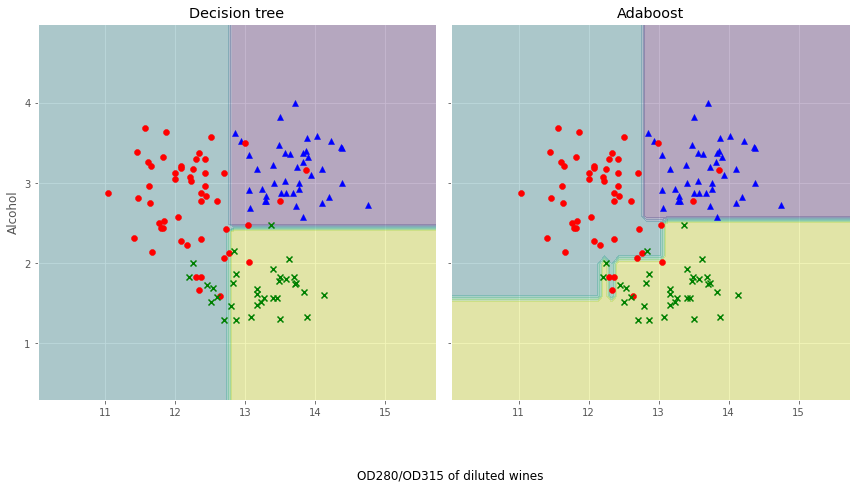

In [40]:
def fuc(max_depth=2):
    tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth =max_depth)
    ada = AdaBoostClassifier(base_estimator=tree,n_estimators=300,learning_rate=0.01,random_state=1)
    tree = tree.fit(X_train,y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    tree_train = accuracy_score(y_train,y_train_pred)
    tree_test = accuracy_score(y_test,y_test_pred)
    print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train,tree_test))

    ada = ada.fit(X_train,y_train)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    ada_train = accuracy_score(y_train,y_train_pred)
    ada_test = accuracy_score(y_test,y_test_pred)
    print('Adaboost train/test accuracies %.3f/%.3f' % (ada_train,ada_test))

    x_min = X_train[:, 0].min() - 1
    x_max = X_train[:, 0].max() + 1
    y_min = X_train[:, 1].min() - 1
    y_max = X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(12, 6))
    for idx, clf, tt in zip([0, 1],[tree, ada],['Decision tree', 'Adaboost']):
        clf.fit(X_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axarr[idx].contourf(xx, yy, Z, alpha=0.3)
        axarr[idx].scatter(X_train[y_train==1, 0],X_train[y_train==1, 1],c='blue', marker='^')
        axarr[idx].scatter(X_train[y_train==2, 0],X_train[y_train==2, 1],c='red', marker='o')
        axarr[idx].scatter(X_train[y_train==3, 0],X_train[y_train==3, 1],c='green', marker='x')
        axarr[idx].set_title(tt)
    axarr[0].set_ylabel('Alcohol', fontsize=12)
    plt.tight_layout()
    plt.text(0, -0.2,s='OD280/OD315 of diluted wines',ha='center',va='center',fontsize=12,transform=axarr[1].transAxes)
    plt.show()

fuc(2)

Decision tree train/test accuracies 0.927/0.926
Adaboost train/test accuracies 1.000/0.852


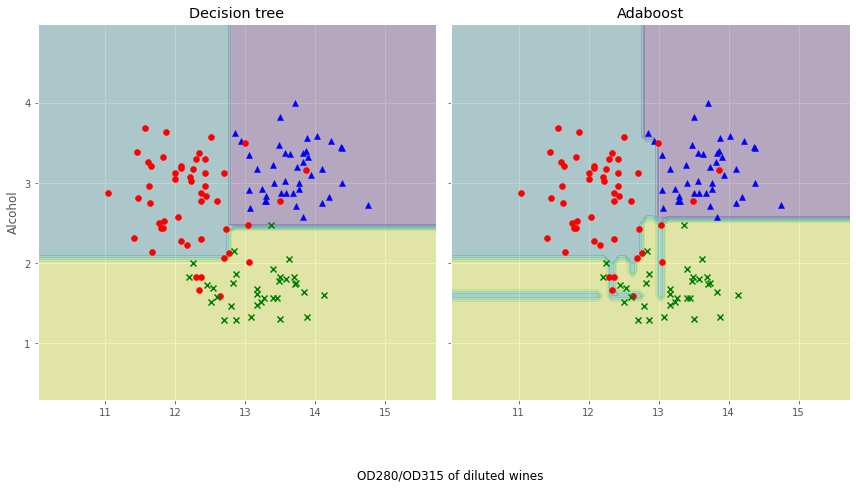

In [39]:
fuc(3)